# Imports

In [1]:
#!/usr/bin/env python3

import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import random

# Measuring Python List Performance

## Obtaining Data

In [2]:
def import_data(path):
    """Load data from csv file into 2d array and return to call site"""
    data = []
    with open(path, "r") as file:
        file_handle = csv.reader(file)
        for row in file_handle:
            numeric_data = [float(i) for i in row]
            data.append(numeric_data)
    return data

In [3]:
def measure_python_list_performance():
    with open('./raw/python_list_performance.csv', 'w') as f:
        subject = []
        for i in range(1, 100):
            t1 = time.process_time()
            subject.append(i)
            t2 = time.process_time()
            j = i-1
            t3 = time.process_time()
            val = subject[j]
            t4 = time.process_time()
            f.write(f"{i},{(t2 - t1):.16f},{(t4 - t3):.16f}\n")

In [4]:
measure_python_list_performance()
data = import_data("./raw/python_list_performance.csv")

## Plot List Data

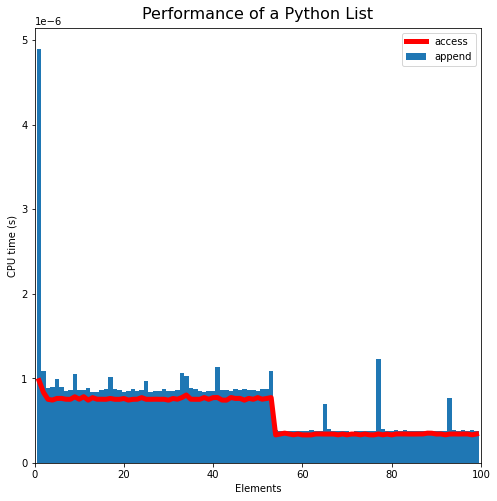

In [5]:
n = [int(i[0]) for i in data]
ti = [i[1] for i in data]
ta = [i[2] for i in data]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

ax = f.add_subplot(1,1,1)
ax.set_xlim(0,100)
ax.bar(n, ti, width=1.0, label="append")
ax.plot(n, ta, linewidth=5, color="red", label="access")
ax.set_xlabel("Elements")
ax.set_ylabel("CPU time (s)")
ax.set_title("Performance of a Python List", fontsize=16, verticalalignment='bottom')
ax.legend(loc="upper right")

plt.savefig("./plots/python_list_performance.png")

# Visualising Modulus Operation

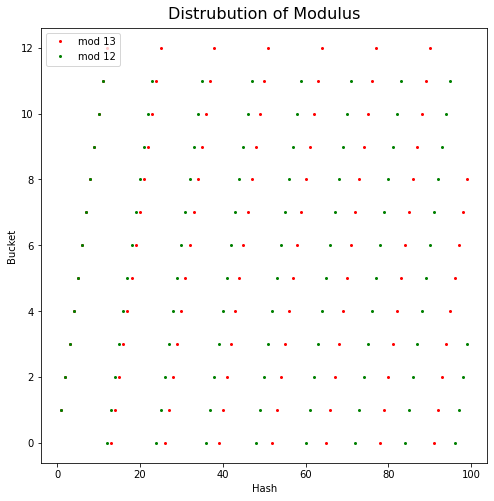

In [6]:
mod_13 = [i%13 for i in n]
mod_12 = [i%12 for i in n]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

ax = f.add_subplot(1,1,1)
ax.plot(n, mod_13, marker="o", linestyle="None", markersize=2, color="red", label="mod 13")
ax.plot(n, mod_12, marker="o", linestyle="None", markersize=2, color="green", label="mod 12")
ax.set_xlabel("Hash")
ax.set_ylabel("Bucket")
ax.set_title("Distrubution of Modulus", fontsize=16, verticalalignment='bottom')
ax.legend(loc="upper left")

plt.savefig("./plots/modulus_scatter.png")

# Random Numbers

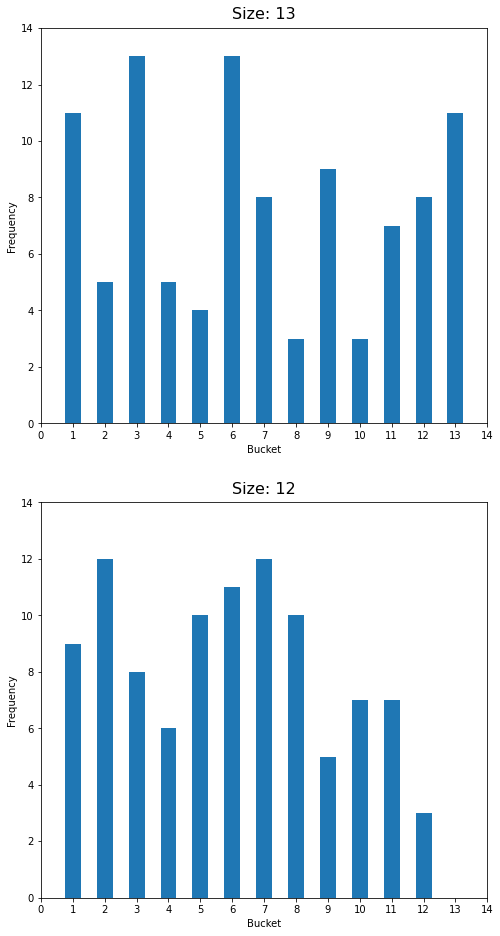

In [7]:
random_numbers = [random.randint(0, 100) for i in range(100)]
random_mod_13 = [i%13 for i in random_numbers]
random_mod_12 = [i%12 for i in random_numbers]
random_dist_mod_13 = [random_mod_13.count(i) for i in range(13)]
random_dist_mod_12 = [random_mod_12.count(i) for i in range(12)]
ylim = max(max(random_dist_mod_13), max(random_dist_mod_12)) + 1

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(16)

ax1 = f.add_subplot(2,1,1)
ax2 = f.add_subplot(2,1,2)
ax1.bar([i+1 for i in range(13)], random_dist_mod_13, width=0.5)
ax2.bar([i+1 for i in range(12)], random_dist_mod_12, width=0.5)
ax1.set_xlim(0,14)
ax2.set_xlim(0,14)
ax1.set_ylim(0,ylim)
ax2.set_ylim(0,ylim)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.set_xlabel("Bucket")
ax1.set_ylabel("Frequency")
ax1.set_title("Size: 13", fontsize=16, verticalalignment='bottom')
ax2.set_xlabel("Bucket")
ax2.set_ylabel("Frequency")
ax2.set_title("Size: 12", fontsize=16, verticalalignment='bottom')

plt.savefig("./plots/bucket_freq_even_dist.png")

## Even Numbers

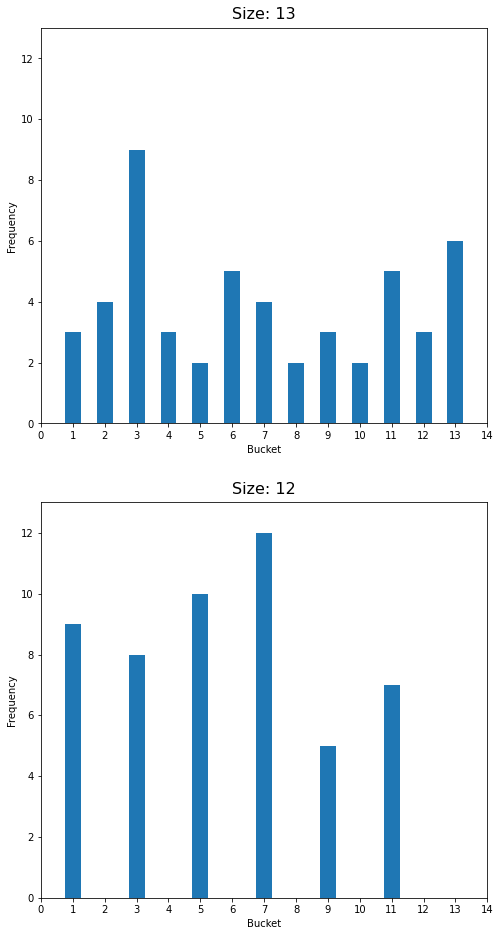

In [8]:
even_numbers = [i for i in random_numbers if i % 2 == 0]
even_mod_13 = [i%13 for i in even_numbers]
even_mod_12 = [i%12 for i in even_numbers]
even_dist_mod_13 = [even_mod_13.count(i) for i in range(13)]
even_dist_mod_12 = [even_mod_12.count(i) for i in range(12)]
ylim = max(max(even_dist_mod_13), max(even_dist_mod_12)) + 1

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(16)

ax1 = f.add_subplot(2,1,1)
ax2 = f.add_subplot(2,1,2)
ax1.bar([i+1 for i in range(13)], even_dist_mod_13, width=0.5)
ax2.bar([i+1 for i in range(12)], even_dist_mod_12, width=0.5)
ax1.set_xlim(0,14)
ax2.set_xlim(0,14)
ax1.set_ylim(0,ylim)
ax2.set_ylim(0,ylim)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.set_xlabel("Bucket")
ax1.set_ylabel("Frequency")
ax1.set_title("Size: 13", fontsize=16, verticalalignment='bottom')
ax2.set_xlabel("Bucket")
ax2.set_ylabel("Frequency")
ax2.set_title("Size: 12", fontsize=16, verticalalignment='bottom')

plt.savefig("./plots/bucket_freq_collisions.png")